In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/audio/fold5/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[ 0.00330576  0.00468387  0.00360455 ... -0.0037562  -0.00348641
 -0.00356705]


In [ ]:
librosa_sample_rate

22050

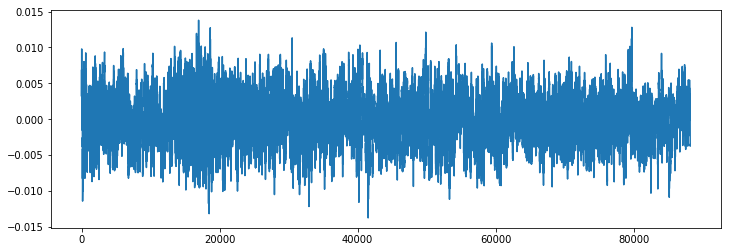

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
%matplotlib inline
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [ ]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

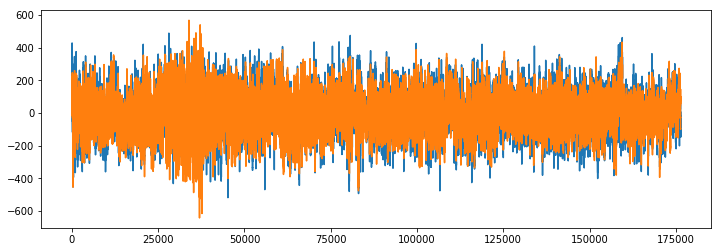

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [ ]:
mfccs

array([[-4.45197296e+02, -4.47219299e+02, -4.49755127e+02, ...,
        -4.77412781e+02, -4.74241730e+02, -4.82704987e+02],
       [ 1.12513969e+02,  1.11970383e+02,  1.12244164e+02, ...,
         1.12045395e+02,  1.12248581e+02,  1.05560913e+02],
       [-1.58260956e+01, -2.30021858e+01, -3.12500191e+01, ...,
        -9.15441895e+00, -1.03232269e+01, -7.39410734e+00],
       ...,
       [-7.82766485e+00, -5.03880405e+00, -4.48165369e+00, ...,
        -1.90692782e-01,  4.34143972e+00,  1.00339069e+01],
       [-1.91763496e+00, -8.02737713e-01, -1.20930457e+00, ...,
        -1.23640239e-01,  2.90504694e-02,  9.22017097e-01],
       [-3.88130605e-01,  3.09317827e-01,  6.72155714e+00, ...,
        -2.33736587e+00, -4.25179911e+00, -2.31322765e+00]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
#Feature extraction
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [06:58, 11.78it/s]C:\Users\Akash_Shrivastava\AppData\Roaming\Python\Python36\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8324it [15:49, 12.09it/s]C:\Users\Akash_Shrivastava\AppData\Roaming\Python\Python36\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8327it [15:49, 14.51it/s]C:\Users\Akash_Shrivastava\AppData\Roaming\Python\Python36\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [16:36,  8.76it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
y.shape

(8732,)

In [ ]:
X

array([[-2.15793015e+02,  7.16661224e+01, -1.31813766e+02, ...,
        -1.68275905e+00, -8.85858595e-01,  3.54388773e-01],
       [-4.24686768e+02,  1.10562271e+02, -5.41482353e+01, ...,
         6.17408693e-01, -6.84974134e-01,  5.71514487e-01],
       [-4.59564667e+02,  1.22800354e+02, -4.79247093e+01, ...,
         2.22541404e+00,  1.54661798e+00, -8.36315691e-01],
       ...,
       [-3.04613159e+02,  1.12619904e+02, -4.71619453e+01, ...,
        -3.03358102e+00,  2.71057296e+00,  7.67189503e+00],
       [-3.44714233e+02,  1.26758133e+02, -5.61771698e+01, ...,
        -7.80225849e+00, -1.77907372e+00,  5.83541918e+00],
       [-3.15933838e+02,  9.56758881e+01, -3.80477676e+01, ...,
         5.77580392e-01, -1.14637651e+01, -5.96535444e+00]], dtype=float32)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119045e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537492e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321608e+00]], dtype=float32)

In [ ]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train.shape

(6985, 10)

In [ ]:
#Model Creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
#Model development
model=Sequential()

###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9298 - accuracy: 0.7037 - val_loss: 0.7422 - val_accuracy: 0.7624

Epoch 00001: val_loss improved from inf to 0.74224, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.9481 - accuracy: 0.6852 - val_loss: 0.7551 - val_accuracy: 0.7619

Epoch 00002: val_loss did not improve from 0.74224
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.9232 - accuracy: 0.6909 - val_loss: 0.7618 - val_accuracy: 0.7670

Epoch 00003: val_loss did not improve from 0.74224
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9010 - accuracy: 0.7026 - val_loss: 0.7405 - val_accuracy: 0.7790

Epoch 00004: val_loss improved from 0.74224 to 0.74053, saving model to saved_models\audio_classification.hdf5
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9323 - accuracy: 0.6866 - v

Epoch 40/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8831 - accuracy: 0.7105 - val_loss: 0.7215 - val_accuracy: 0.7796

Epoch 00040: val_loss did not improve from 0.69936
Epoch 41/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8591 - accuracy: 0.7162 - val_loss: 0.6925 - val_accuracy: 0.7819

Epoch 00041: val_loss improved from 0.69936 to 0.69254, saving model to saved_models\audio_classification.hdf5
Epoch 42/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8942 - accuracy: 0.7092 - val_loss: 0.6955 - val_accuracy: 0.7888

Epoch 00042: val_loss did not improve from 0.69254
Epoch 43/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8922 - accuracy: 0.7067 - val_loss: 0.7164 - val_accuracy: 0.7745

Epoch 00043: val_loss did not improve from 0.69254
Epoch 44/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8954 - accuracy: 0.7107 - val_loss: 0.7025 - val_accuracy: 0.7790

Epoch 00044


Epoch 00079: val_loss did not improve from 0.67032
Epoch 80/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8710 - accuracy: 0.7089 - val_loss: 0.6932 - val_accuracy: 0.7853

Epoch 00080: val_loss did not improve from 0.67032
Epoch 81/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8338 - accuracy: 0.7251 - val_loss: 0.6776 - val_accuracy: 0.7916

Epoch 00081: val_loss did not improve from 0.67032
Epoch 82/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8423 - accuracy: 0.7204 - val_loss: 0.6732 - val_accuracy: 0.7928

Epoch 00082: val_loss did not improve from 0.67032
Epoch 83/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8546 - accuracy: 0.7244 - val_loss: 0.6912 - val_accuracy: 0.7705

Epoch 00083: val_loss did not improve from 0.67032
Epoch 84/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8461 - accuracy: 0.7214 - val_loss: 0.6784 - val_accuracy: 0.7871

Epoch 00084: val_lo

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7813394665718079


In [ ]:
model.predict_classes(X_test)

C:\Users\Akash_Shrivastava\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 3, 4, ..., 1, 0, 9], dtype=int64)

In [ ]:
filename="UrbanSound8K/9223-2-0-5.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [ ]:
audio

array([ 0.05013395,  0.11811938,  0.13905543, ..., -0.02259011,
        0.01326968,  0.04175531], dtype=float32)

In [ ]:
sample_rate

22050

In [ ]:
print(mfccs_scaled_features)

[-244.86308     101.42545     -64.01457      23.360817    -26.921812
    7.966272     -5.4280224     1.2389349    -6.8449674    -2.8225594
   -7.5166297    15.204419      1.9627911     2.6619036    -6.098458
    1.3073301    -5.174937      8.108758     -5.1312437    -1.6631837
   -6.843592      3.1613364     2.7688398     2.380841     -1.5309212
    1.4451679     4.5029736     0.58805776   -0.3669244     1.7962378
    1.9392291    -3.1545033    -3.075577      3.4675646     2.9171891
   -1.1335706     3.193152      0.581126     -3.68965       1.7186856 ]


In [ ]:
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[[-244.86308     101.42545     -64.01457      23.360817    -26.921812
     7.966272     -5.4280224     1.2389349    -6.8449674    -2.8225594
    -7.5166297    15.204419      1.9627911     2.6619036    -6.098458
     1.3073301    -5.174937      8.108758     -5.1312437    -1.6631837
    -6.843592      3.1613364     2.7688398     2.380841     -1.5309212
     1.4451679     4.5029736     0.58805776   -0.3669244     1.7962378
     1.9392291    -3.1545033    -3.075577      3.4675646     2.9171891
    -1.1335706     3.193152      0.581126     -3.68965       1.7186856 ]]
(1, 40)


In [ ]:
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)

[2]


C:\Users\Akash_Shrivastava\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

array(['children_playing'], dtype='<U16')